---
title: "Dimensionality Reduction"
format: html
execute:
    echo: true
code-fold: true
link-external-newwindow: true
bibliography: reference.bib
website:
  back-to-top-navigation: true
---

## Project Proposal

Using the EDM subgenres dataset, I plan to use PCA and t-SNE to reduce the dimensions of my dataset in order to understand and utilize the most important features of the data. The objective is to reduce the number of variables to predict what genre the song belongs to. Which features are the most important in predicting these genres? We start with 13 dimensions in the dataset and will use Python and scikitlearn to perform PCA and t_SNE dimensionality reduction techniques.

## Principal Component Analysis (PCA)

### What is PCA?

PCA is like a magic tool that helps us understand and simplify complex data. Imagine you have a bunch of data with many measurements or features, like the height, weight, age, and income of people. PCA allows you to find the most important things that explain most of the variation in the data.

Here's how it works:

1. **Data Simplification:** PCA takes all those measurements and figures out which ones are most important. It does this by creating new variables, called "principal components," that are combinations of the original measurements.

2. **Reduce Dimensionality:** These principal components are ordered from the most important to the least important. By using only the top ones, you can simplify your data while preserving most of the important information. It's like taking a big puzzle and focusing on the pieces that matter the most.

3. **Visualization:** PCA also helps in visualizing data. If you had data in many dimensions (imagine 10 or 20 different measurements), it's hard to picture. PCA can compress this information into just a few dimensions that you can easily plot on a graph.

4. **Noise Reduction:** By focusing on the most significant aspects of the data, PCA can also help remove some of the noise or irrelevant details, making it easier to spot patterns and relationships.

In essence, PCA is like finding the essential ingredients in a recipe, allowing you to understand and work with complex data more easily. It's a handy tool in data analysis and can be used in various fields to uncover hidden insights in data.

### Determining Optimal Prinicipal Components

Below I used a Scree Plot to determine the optimal number of principal components to keep. The plot shows the explained variance by each principal component. We want to look for the 'elbow' of the plot or where the plot levels off in explained variance. Although the explained variance overall is quite low, in the graph, I believe around 5-6 would be the optimal number of principal components to keep. We will use 6 for our purposes, which decreases our dimensions by over half!

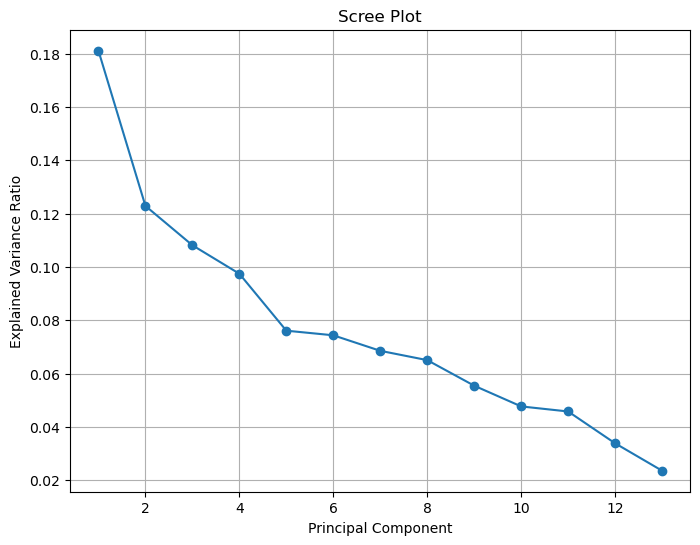

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

data = standardized_data

# Create a PCA object
pca = PCA()

# Fit the PCA model to standardized data
pca.fit(data)

# Get the explained variance ratios
explained_variance_ratio = pca.explained_variance_ratio_

# Create a scree plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='-')
plt.title("Scree Plot")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.grid()
plt.show()


### Performing PCA & Analysis

In the below code we perform the PCA and are returned with the explained variance ratios for each of the top 6 principal components. The total variance explained by these 6 principal components is approximately 66.10%. These components collectively account for this proportion of the total variance in the data. I then created a pairplot that shows a scatterplot matrix of each principal component. These graphs show the relationships and patterns between different prinicpal components. In many of the graphs, there does not appear to be any definitive clustering, except in the PC5 and PC6 plot. It is also evident to see the outliers within the data, especially those that are tightly grouped together.

In [ ]:
# Import the necessary libraries
import numpy as np
from sklearn.decomposition import PCA

# Assuming you have your data in the 'standardized_data' variable
# Make sure your data is organized as rows (samples) and columns (features).

# Create a PCA object, specifying the number of components you want to keep
n_components = 6
pca = PCA(n_components=n_components)

# Fit the PCA model to your standardized data
pca.fit(standardized_data)

# Transform your data to the first 'n_components' principal components
transformed_data = pca.transform(standardized_data)

# 'transformed_data' now contains your data in the reduced dimensionality of 'n_components'

# You can also access the explained variance ratio to see how much variance
# is explained by each principal component.
explained_variance = pca.explained_variance_ratio_

# Print the explained variance
print("Explained Variance Ratios:", explained_variance)


Explained Variance Ratios: [0.18106648 0.12288109 0.10812735 0.09744782 0.07609769 0.07436597]


/Users/schenfeldp/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


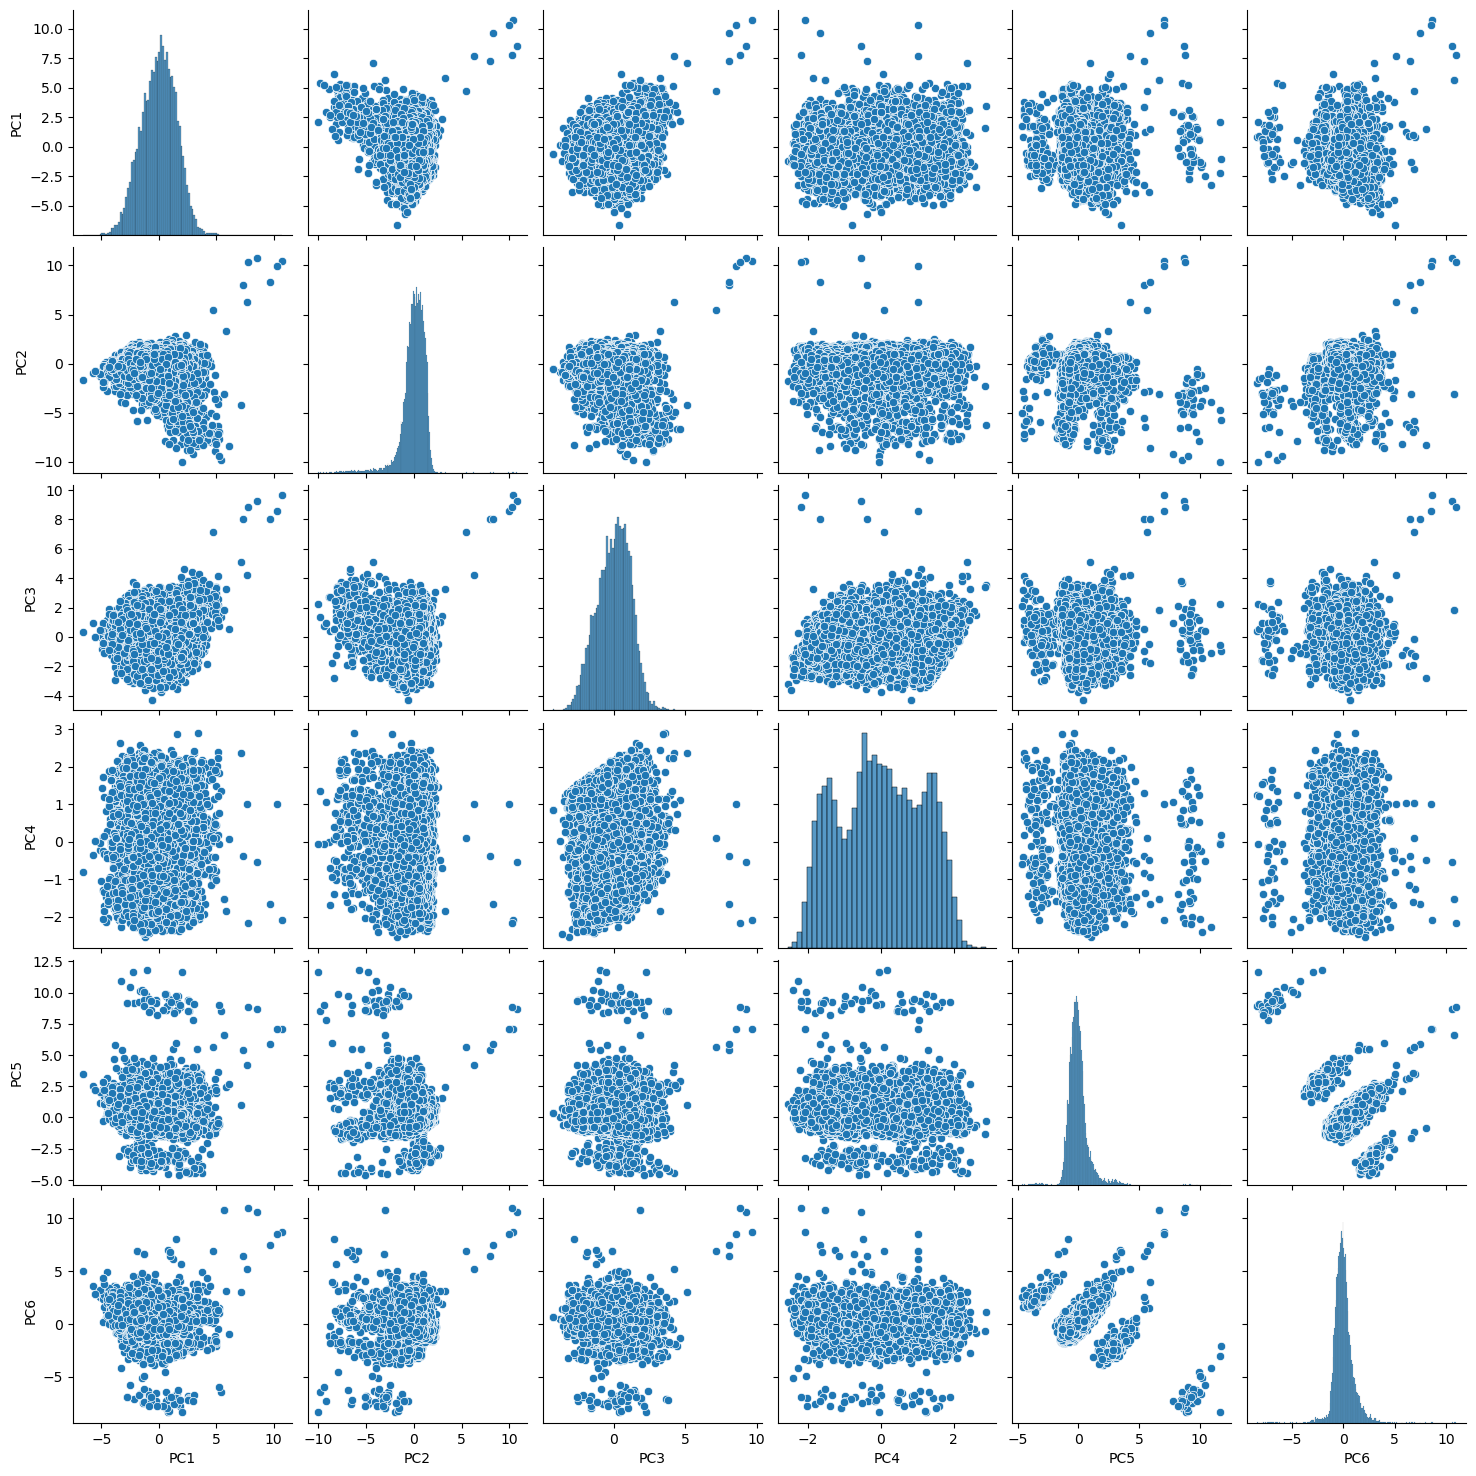

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame from the transformed data
data_df = pd.DataFrame(transformed_data, columns=["PC1", "PC2", "PC3", "PC4", "PC5", "PC6"])

# Create a scatterplot matrix
sns.pairplot(data_df)
plt.show()


## t-Distributed Stochastic Neighbor Embedding (t-SNE)

### What is t-SNE?
t-SNE, or t-Distributed Stochastic Neighbor Embedding, is a data visualization technique that helps you understand and explore high-dimensional data in a more intuitive and lower-dimensional way. 

In simple terms, t-SNE takes a complex dataset with many features and transforms it into a two- or three-dimensional representation. In this new representation, similar data points are positioned near each other, and dissimilar points are placed farther apart. This makes it easier to see clusters or patterns in your data.

Imagine you have a puzzle with many puzzle pieces, and you want to simplify it by grouping together similar pieces. t-SNE is like a magic tool that takes those pieces and arranges them on a smaller puzzle board so that similar pieces are next to each other, making it easier for you to see the bigger picture and understand how they relate to each other.

Keep in mind that t-SNE is useful for data visualization and exploration but might not preserve the exact distances or relationships between data points in the original high-dimensional space. It's a handy tool for uncovering structures and patterns in your data.

### Implementing t-SNE
Below I implemented t-SNE on my EDM subgenre dataset. The visualization shows clusters within the dataset. It seems to be a trend where the clusters for this dataset are not very distinct.

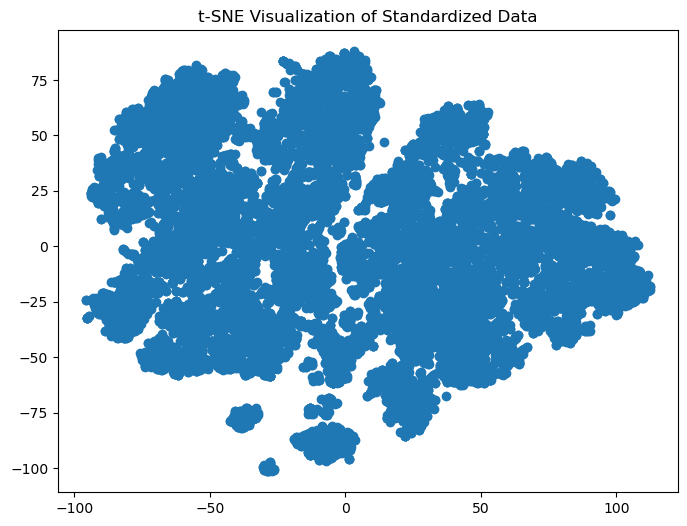

In [ ]:

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Perform t-SNE on the standardized data with two components
tsne = TSNE(n_components=2, random_state=44)
tsne_result = tsne.fit_transform(standardized_data)

# Create a scatter plot to visualize the t-SNE results
plt.figure(figsize=(8, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1]) 
plt.title("t-SNE Visualization of Standardized Data")
plt.show()


### Exploring Different Perplexities
Below we explore varying perplexities within t-SNE. You can see that when the perplexity is very low (5) the graph is more of just one big blob. As the perplexity increases, you can see the clusters start to separate further and further. 

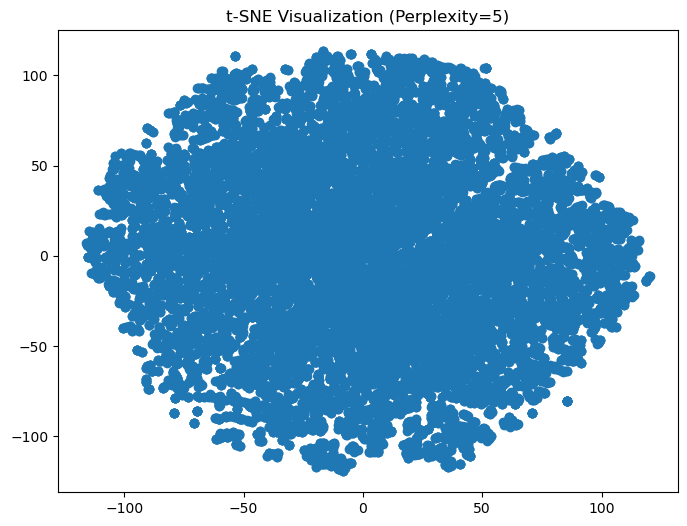

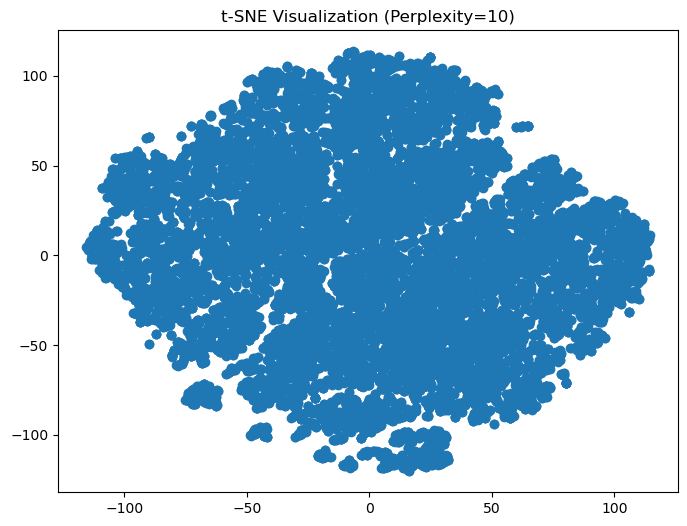

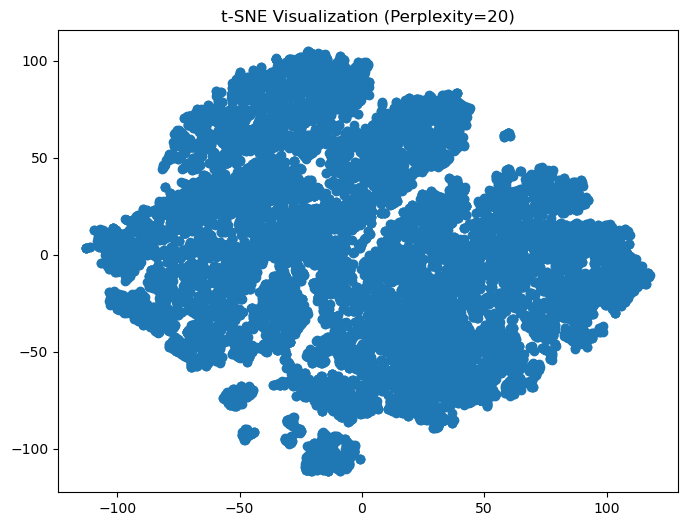

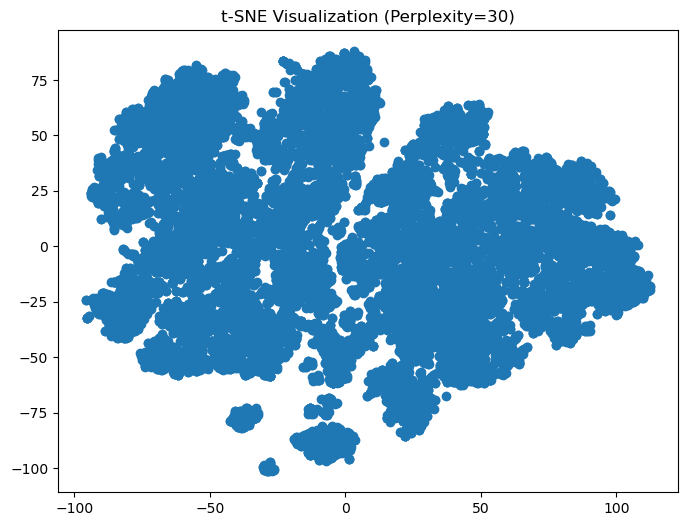

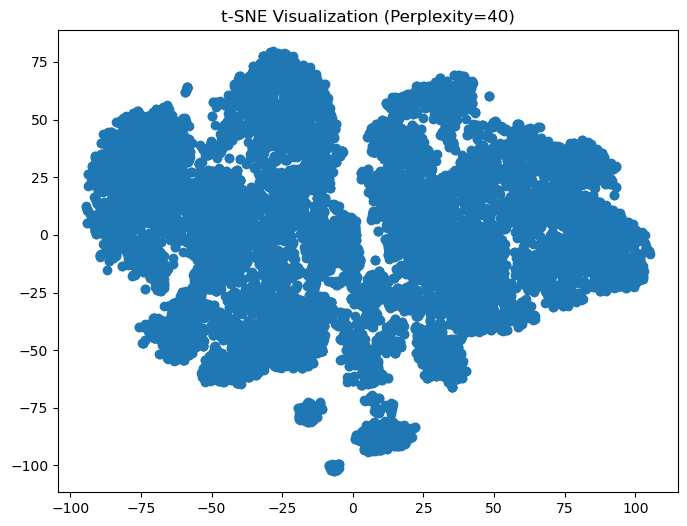

In [ ]:
# Import the necessary libraries
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Define a range of perplexity values to explore
perplexities = [5, 10, 20, 30, 40]

# Iterate over the perplexity values
for perplexity in perplexities:
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    tsne_result = tsne.fit_transform(standardized_data)
    
    # Create a scatter plot for the current perplexity value
    plt.figure(figsize=(8, 6))
    plt.scatter(tsne_result[:, 0], tsne_result[:, 1])
    plt.title(f"t-SNE Visualization (Perplexity={perplexity})")
    plt.show()


## Evaluation and Comparison of PCA and t-SNE

1. **Effectiveness in Preserving Data Structure and Information:**
   - PCA: PCA is effective at preserving the overall data structure and global patterns in the data. It achieves this by maximizing variance along principal components. However, it may not capture fine-grained local structures and non-linear relationships.
   - t-SNE: t-SNE is effective at preserving local structures and capturing non-linear relationships. It's particularly useful for revealing clusters and patterns that might not be evident in the original high-dimensional space. However, it may not preserve global structures as well as PCA.

2. **Visualization Capabilities:**
   - PCA: PCA provides a clear visualization of global data structures, making it suitable for understanding broad data relationships. It reduces data dimensions in a way that retains as much variance as possible. However, PCA might not reveal fine local structures or clusters.
   - t-SNE: t-SNE excels in visualizing local structures and clusters. It's effective at revealing fine-grained patterns and relationships. It's especially useful for exploratory data analysis when you want to focus on local details.

3. **Trade-offs and Scenarios:**
   - PCA is advantageous when:
     - You want to reduce dimensionality while preserving as much information as possible.
     - You are interested in understanding global patterns and relationships in the data.
     - Your data has a linear structure, and you need to remove multicollinearity.
     - You need a simplified representation of data for modeling purposes.

   - t-SNE is advantageous when:
     - You want to explore and visualize local structures, clusters, and non-linear relationships.
     - The high-dimensional data contains complex, non-linear patterns that are not easily visible in the original space.
     - You are focusing on data exploration and fine-grained insights, rather than dimensionality reduction.
     - Your dataset is suitable for capturing local structures without losing too much global context.

**In summary:**
- PCA and t-SNE serve different purposes and have their own strengths and weaknesses. The choice between them depends on your specific objectives and the nature of your data.
- PCA is best suited for dimensionality reduction, preserving global structure, and understanding broad data relationships.
- t-SNE is effective for local structure preservation and fine-grained pattern recognition, making it a powerful tool for data exploration and visualization.
- In practice, it's common to use both techniques, depending on the goals of the analysis. PCA can be used for initial dimensionality reduction, followed by t-SNE to explore and visualize local structures and clusters.